# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon = pd.read_csv(fp)

In [2]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

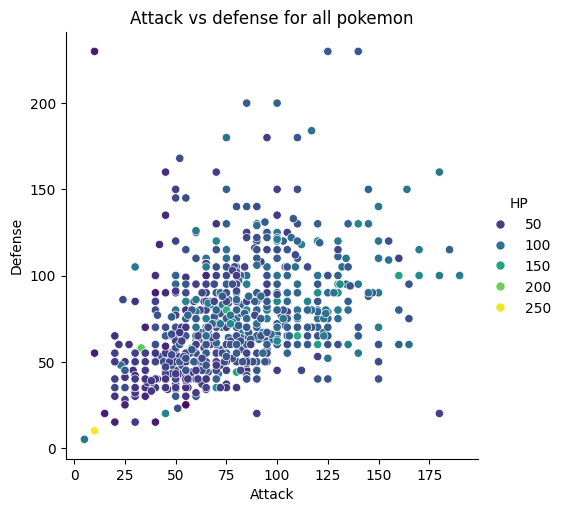

In [5]:
sns.relplot(data=pokemon,
            x="Attack",
            y="Defense",
            hue="HP",
            palette="viridis")

plt.title("Attack vs defense for all pokemon");

#### From the plot, I observe...
While a majority of the data is concentrated at the center of the scatterplot, roughly between 25 and 125 for defense, and between 20 and 110 for attack, the data still follows an upward trend. I also notice that there is one data point that has a high HP (250), with low defense and attack. This point is different that those around in because those points have low HP (50). Outside of this point, the is a linear gradient in the color conveying that higher defense and attack mean higher HP.

***Results***: There is a positive correlation between `Attack` and `Defense`. In general, hit-points (`HP`) is higher for Pokemons with higher `Attack` and `Defense` values.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

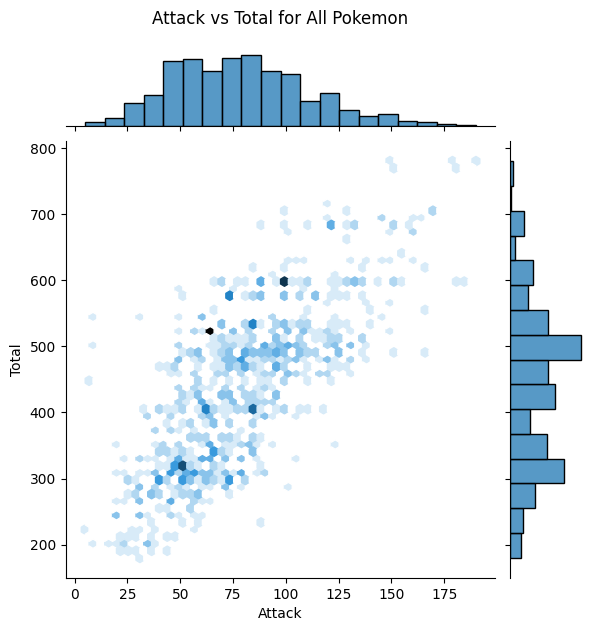

In [6]:
sns.jointplot(data=pokemon,
             x="Attack",
             y="Total",
             kind="hex",
             gridsize=50)

plt.title("Attack vs Total for All Pokemon", y = 1.25);


#### From the plot, I observed...
Looking at the histograms, the distribution of total statistics is bimodal with two peaks, meaning there are generally two group of pokemon, those who hover around 250 to 350 and 400 to 550. The distrubution for attacks is slightly right skewed, which indicates high attack is less common.

Looking at the hexbin plot, I can see that there is an upward trend between a pokemon's total and attack statistics. Connecting the high density points and keeping in mind outliers that are potentially lost, there is a moderate correlation.

***Results***: There is a positive correlation between `Attack` and `Total`. Higher `Attack` generally means higher `Total` strength of a pokemon.


## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

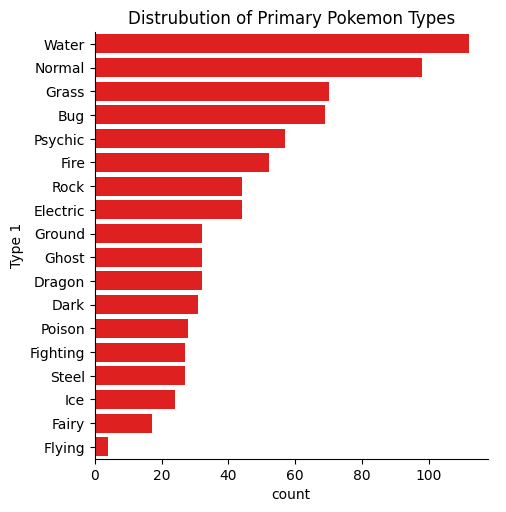

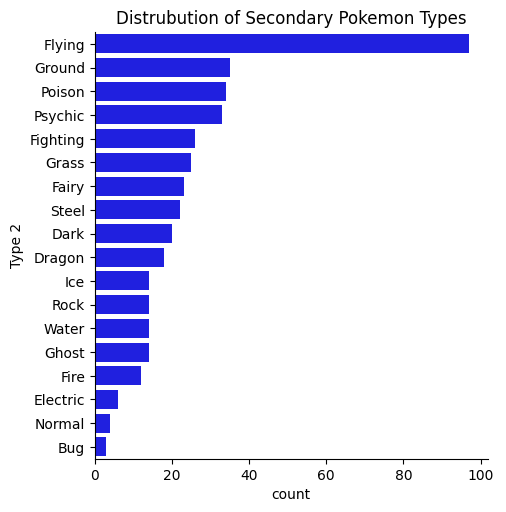

In [7]:
sns.catplot(data=pokemon,
            y="Type 1",
            kind="count",
            color="red",
            order=pokemon['Type 1'].value_counts().index)

plt.title("Distrubution of Primary Pokemon Types");

sns.catplot(data=pokemon,
            y="Type 2",
            kind="count",
            color="blue",
            order=pokemon['Type 2'].value_counts().index)

plt.title("Distrubution of Secondary Pokemon Types");


#### From the plot, I observed...
The most common `Type 1` pokemon are water, normal, grass, and bug. On the other hand, the more rare are ice, fairy, and flying.

The most common `Type 2` pokemon are flying, ground, and poison. On the other hand, the more rare are electric, normal, and bug.

Bug and normal are some of the most common primary types, but are the least common secondary type. Likewise, flying is the most common secondary type, but the least common primary type.

***Results***: The data shows a potential inverse relationship between the frequency of types where most common `Type 1` appear rarely as `Type 2`.

## Q4: Is a pokemon's speed related to its defense?



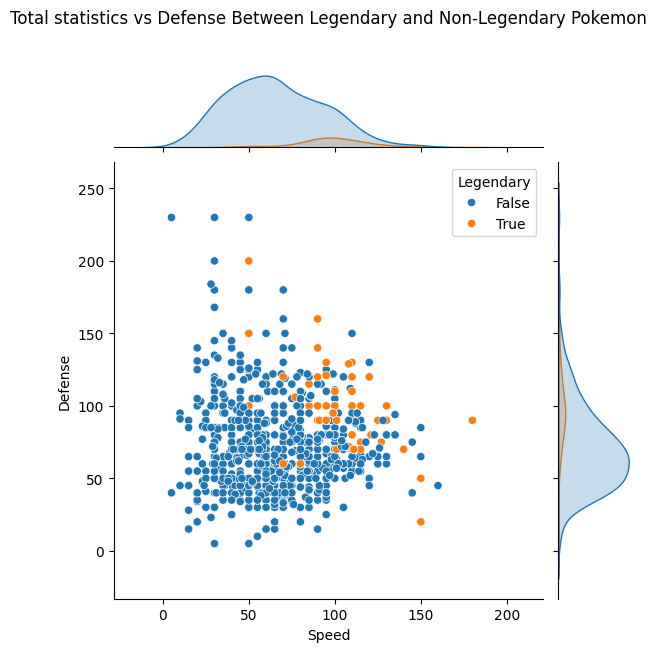

In [8]:
#Use jointplot to find a correlation between speed and defense for all pokemon
sns.jointplot(data=pokemon,
            x="Speed",
            y="Defense",
            hue="Legendary")


plt.title("Total statistics vs Defense Between Legendary and Non-Legendary Pokemon", y=1.3);

#### From the plot, I observed...
There is a difference between non-legendary and legendary pokemon. For non-legendary pokemon, there is a cluster of data points near the center of the plot with no clear director. This tells me, they often have moderate speed and defense. On the other hand, the distribution of legendary pokemon follows a downward trend moving to the right.

***Results***: For non-legendary pokemon, speed is not strongly related to defense. On the other hand, for legendary pokemon, there is a potential negative correlation beween `Speed` and `Defense`. So, for legendary pokemon faster `Speed` often means lower `Defense`. In general, considering all pokemon, speed and defense don't have a strong correlation.

## Q5: Is a pokemon's total statistics related to its special attack?









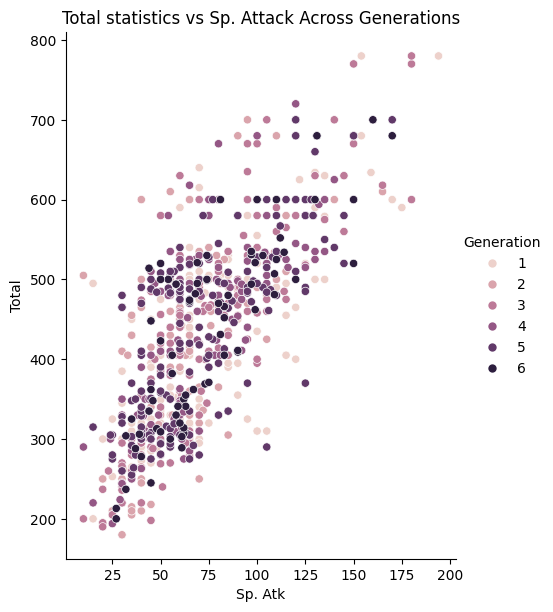

In [9]:
#Use relplot to find a correlation between total statistics and special attack
sns.relplot(data=pokemon,
            x="Sp. Atk",
            y="Total",
            hue="Generation",
            height=6,
            aspect=0.8)

plt.title("Total statistics vs Sp. Attack Across Generations");

#### From the plot, I observed...
Also, across generations, distribution of `Total` has narrowed from around 100 to 800 (Generation 2) to around 200 to 700 (Generation 6). This is also the case for `Sp. Atk`, where it has gone from about 15 to 180 (Generation 3) to 25 to 160 (Generation 6).

In general, all pokemon across 6 generations have an upward trend.

***Results***: While the distribution of `Total` and `Sp. Atk` has narrowed as generations progress, overall, there is a positive correlation between `Total` and `Sp. Atk`. This mean pokemon with higher `Total` scores likely have higher `Sp. Atk`.

## Q6: How do the distributions of a pokemon's total statistics vary between legendary and non legendary pokemon?

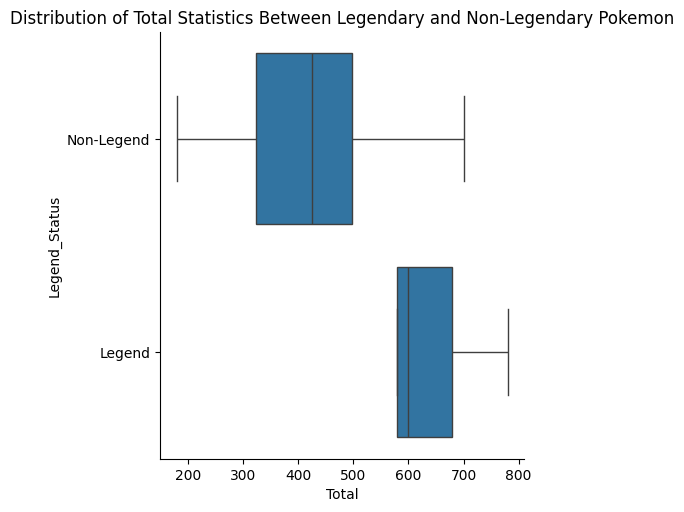

In [10]:
#Add a new column Legend_Status that has either "Legend" or "Non-Legend", use axis=1 so the operation is performed row wise
pokemon["Legend_Status"] = pokemon.apply(lambda x: "Legend" if x["Legendary"] == True
                                         else "Non-Legend", axis=1)

#Use a boxplot to visualize the distribution
sns.catplot(data=pokemon,
            x="Total",
            y="Legend_Status",
            kind="box")

plt.title("Distribution of Total Statistics Between Legendary and Non-Legendary Pokemon");

#### From the plot, I observed...
The distribution of non-legend pokemon is wider than that of legendary pokemon. Also, there is around a 375 (575-200) difference between the minimum total statistic between legendary and non-legend pokemon. About 25% of the legendary pokemon have a total statistic higher than the maximum non-legend pokemon.

***Results***: The distribution of `Total` scores for legendary pokemon is shifted towards higher values compared to non-legend pokemon. So, in general, legendary poken are stronger than non-legendary pokemon.